In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import scipy.interpolate as spi
import math
import matplotlib.figure as fig
from scipy import stats

In [18]:
data1 = pd.read_csv("../FilesEj1_2/OutputEj1_1.csv")
data2 = pd.read_csv("../FilesEj1_2/OutputEj1_2.csv")
data3 = pd.read_csv("../FilesEj1_2/OutputEj1_3.csv")
data4 = pd.read_csv("../FilesEj1_2/OutputEj1_4.csv")

0.1


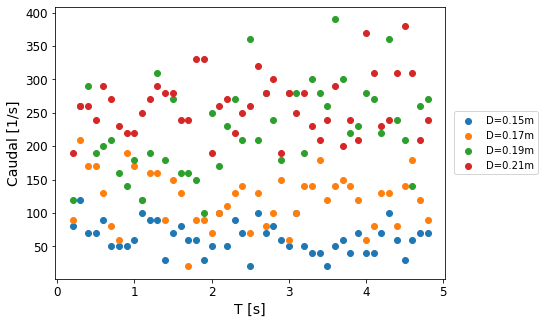

In [19]:
dt = data1['Dt'][0]
print(dt)

counts1 = data1['N']/dt
counts2 = data2['N']/dt
counts3 = data3['N']/dt
counts4 = data4['N']/dt
counts1 = counts1[1:-1:1]
counts2 = counts2[1:-1:1]
counts3 = counts3[1:-1:1]
counts4 = counts4[1:-1:1]

parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.scatter(data1['Dt'][1:-1:1], counts1, label = "D=0.15m")
plt.scatter(data2['Dt'][1:-1:1], counts2, label = "D=0.17m")
plt.scatter(data3['Dt'][1:-1:1], counts3, label = "D=0.19m")
plt.scatter(data4['Dt'][1:-1:1], counts4, label = "D=0.21m")
plt.xlabel("T [s]")
plt.ylabel("Caudal [1/s]")
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))


In [20]:
def get_values(array):
    prom = array.mean()
    sum = 0
    for i in array:
        sum += (i-prom)**2
    ret = math.sqrt(sum/len(array))
    return prom, ret

63.829787234042556
120.42553191489361
229.14893617021278
260.8510638297872


Text(0, 0.5, 'Caudal [1/s]')

<Figure size 504x360 with 0 Axes>

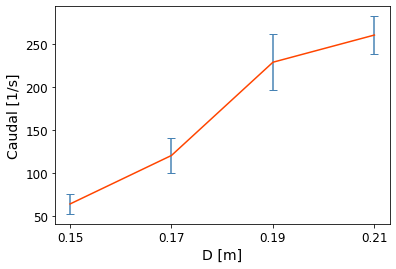

In [21]:
cp1, d1 = get_values(counts1)
cp2, d2 = get_values(counts2)
cp3, d3 = get_values(counts3)
cp4, d4 = get_values(counts4)
print(cp1)
print(cp2)
print(cp3)
print(cp4)
array_x = [0.15, 0.17, 0.19, 0.21]
array_x_str = ["0.15", "0.17", "0.19", "0.21"]
array_y = [cp1, cp2, cp3, cp4]
y_errs = [d1, d2, d3, d4]
parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.subplots()
plt.errorbar(np.array(array_x_str), np.array(array_y), yerr=np.array(y_errs)/2, capsize=4, color="orangered", ecolor="steelblue")
plt.xlabel("D [m]")
plt.ylabel("Caudal [1/s]")

In [22]:
def getBeverloo(c, i):
    np = 300/(0.35*0.3*0.3)
    return np * math.sqrt(9.8) * (array_x[i] - (c * 0.0225))**2.5

2.5078000000033267


Text(0, 0.5, 'ECM')

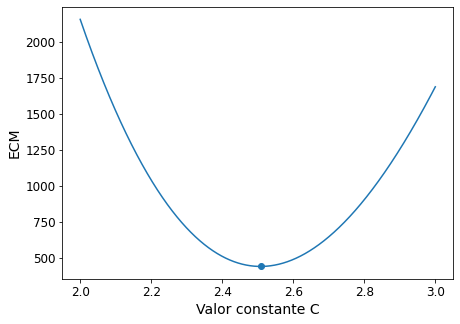

In [25]:
Ds = []
ecm = []
c = []
min_sum = 99999999999
min_C = 0
paso = 1/100000
i = 2
while i<3:
    c.append(i)
    sum = 0
    for j in range(len(array_x)):
        # sum += (array_y[j] - (2 *(array_x[j] / 1000) * paso * i))**2
        sum += (array_y[j] - getBeverloo(i, j))**2
    sum = sum/4
    ecm.append(sum)
    if sum < min_sum:
        min_sum = sum
        min_C = i
    i+=paso
print(min_C)

parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.plot(c, ecm)
plt.xlabel("C")
plt.ylabel("E(C)")
plt.scatter([min_C], [min_sum])
plt.xlabel("Valor constante C")
plt.ylabel("ECM")

Text(0, 0.5, 'Caudal [1/s]')

<Figure size 576x432 with 0 Axes>

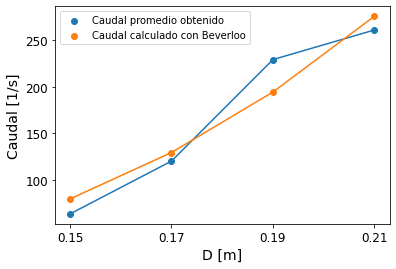

In [24]:
parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(8,6))
plt.subplots()
plt.plot(array_x_str, array_y)
plt.scatter(array_x_str, array_y, label = "Caudal promedio obtenido")
curva1 = [getBeverloo(min_C,0), getBeverloo(min_C,1), getBeverloo(min_C,2), getBeverloo(min_C,3)]
plt.plot(array_x_str, curva1)
plt.scatter(array_x_str, curva1, label = "Caudal calculado con Beverloo")
plt.legend()
plt.xlabel("D [m]")
plt.ylabel("Caudal [1/s]")